In [ ]:
# Install TensorFlow (if not pre-installed)
!pip install tensorflow scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
# Step 1: Generate a synthetic dataset with 5 features and binary labels
from sklearn.datasets import make_classification
import pandas as pd

# Ensure the sum of informative + redundant + repeated < n_features
X, y = make_classification(n_samples=1000,
                           n_features=5,
                           n_informative=4,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=42)

# Step 2: Convert to pandas DataFrame
data = pd.DataFrame(X, columns=['age', 'blood_pressure', 'heart_rate', 'glucose', 'cholesterol'])
data['survival'] = y

# Step 3: Preview the dataset
data.head()


,age,blood_pressure,heart_rate,glucose,cholesterol,survival
0,1.349630,-2.099873,-1.679421,-2.062806,0.357603,0
1,1.361840,0.363285,0.016623,-1.986204,1.679191,0
2,0.697454,-1.039087,-0.625281,-0.909185,0.678725,0
3,-1.088432,1.159765,-0.285759,-0.741756,-0.958418,1
4,-3.430056,1.565373,-0.111399,0.217687,-2.605821,0


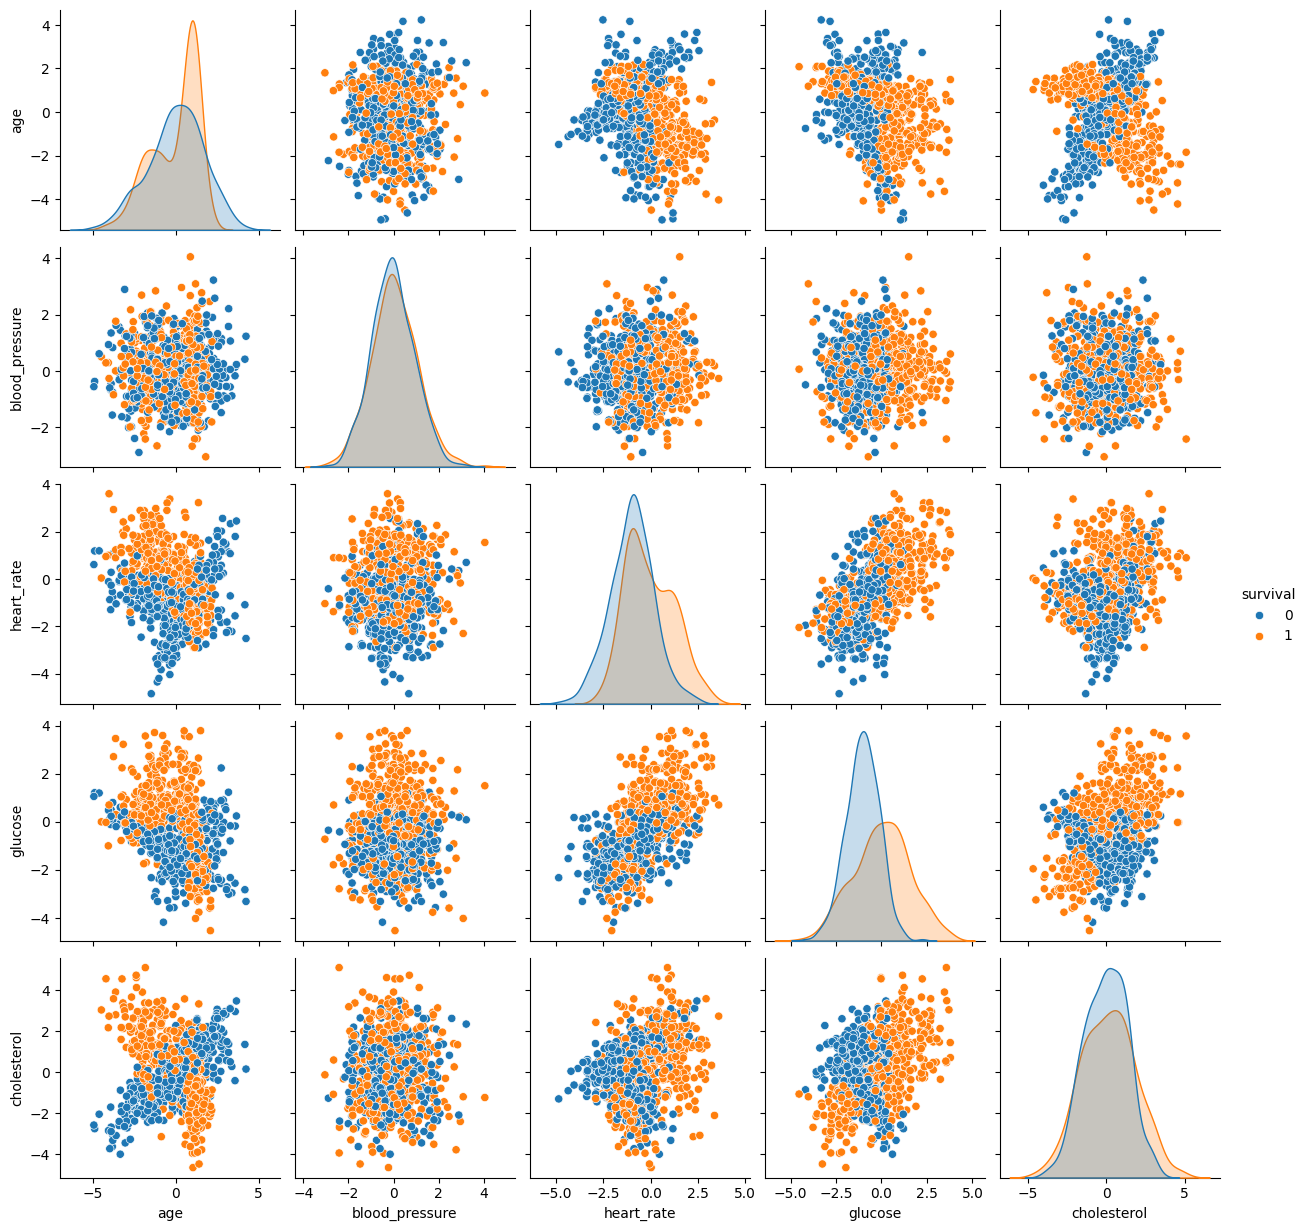

In [ ]:
data.head()
data.describe()
data['survival'].value_counts()

# Pair plot (optional)
sns.pairplot(data, hue='survival')


In [ ]:
X = data.drop('survival', axis=1)
y = data['survival']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241 (964.00 B)

 Trainable params: 241 (964.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2,
                    epochs=50, batch_size=16, verbose=1)


Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5981 - loss: 0.6729 - val_accuracy: 0.7000 - val_loss: 0.6403
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7376 - loss: 0.6265 - val_accuracy: 0.7750 - val_loss: 0.6044
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8010 - loss: 0.5948 - val_accuracy: 0.8062 - val_loss: 0.5658
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8469 - loss: 0.5555 - val_accuracy: 0.8313 - val_loss: 0.5247
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8491 - loss: 0.5037 - val_accuracy: 0.8375 - val_loss: 0.4806
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8506 - loss: 0.4523 - val_accuracy: 0.8250 - val_loss: 0.4385
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8698 - loss: 0.4147 - val_accuracy: 0.8438 - val_loss: 0.4003
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8752 - loss: 0.3889 - val_accuracy: 0.8500 - val_loss

In [ ]:
# Final accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9438 - loss: 0.2028 
Test Accuracy: 0.93


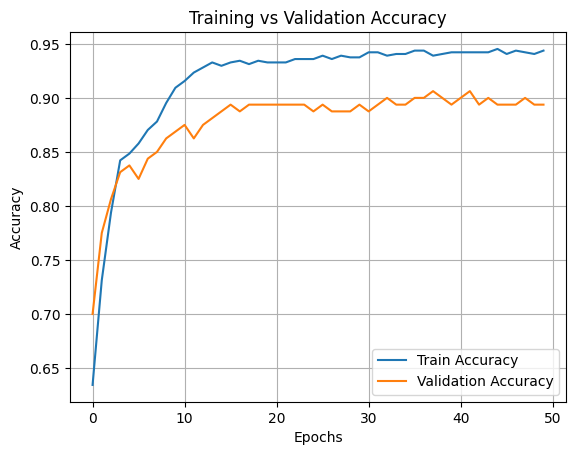

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Confusion Matrix:
[[94  5]
 [ 9 92]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        99
           1       0.95      0.91      0.93       101

    accuracy                           0.93       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.93      0.93      0.93       200



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


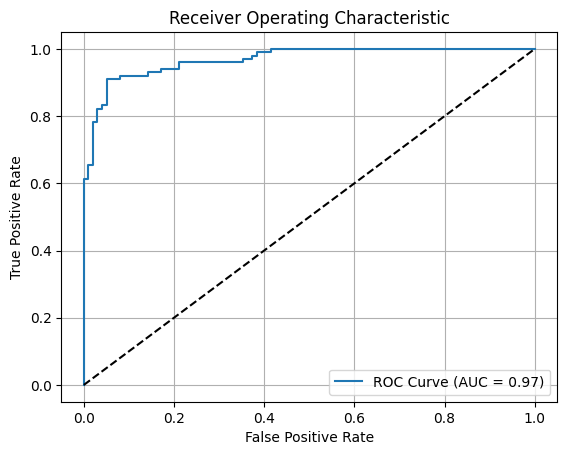

In [ ]:
y_proba = model.predict(X_test).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.grid(True)
plt.show()
